In [179]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

#Set initial map variables: Number of sources, grid size
numsamples=1000
grid_size=100




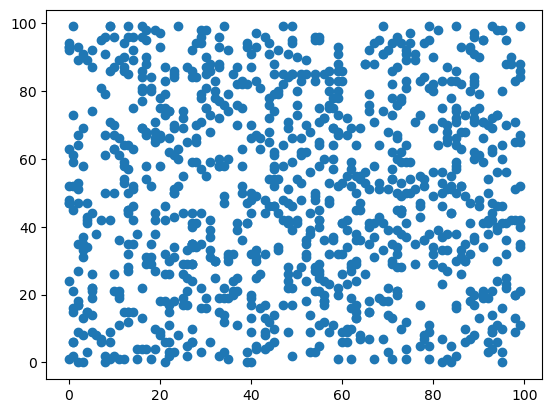

In [180]:
#Simulate parameters of each source. 

#Randomly generate x and y coordinates
xcoord=[]
ycoord=[]

for i in range (numsamples):
    x=np.random.randint(0, grid_size)
    y=np.random.randint(0, grid_size)
    xcoord.append(x)
    ycoord.append(y)
plt.scatter(xcoord,ycoord)



0.9419192409540766


(array([ 1.,  1.,  0.,  1.,  2.,  2.,  3.,  1.,  8.,  9., 11.,  9., 11.,
        23., 14., 25., 21., 24., 26., 35., 39., 37., 42., 68., 41., 51.,
        63., 38., 43., 43., 32., 46., 24., 37., 29., 26., 20., 17., 16.,
        15., 11.,  8.,  9.,  6.,  4.,  3.,  1.,  1.,  1.,  2.]),
 array([-3.16084914, -3.03824372, -2.9156383 , -2.79303287, -2.67042745,
        -2.54782202, -2.4252166 , -2.30261118, -2.18000575, -2.05740033,
        -1.93479491, -1.81218948, -1.68958406, -1.56697863, -1.44437321,
        -1.32176779, -1.19916236, -1.07655694, -0.95395152, -0.83134609,
        -0.70874067, -0.58613524, -0.46352982, -0.3409244 , -0.21831897,
        -0.09571355,  0.02689187,  0.1494973 ,  0.27210272,  0.39470815,
         0.51731357,  0.63991899,  0.76252442,  0.88512984,  1.00773526,
         1.13034069,  1.25294611,  1.37555154,  1.49815696,  1.62076238,
         1.74336781,  1.86597323,  1.98857865,  2.11118408,  2.2337895 ,
         2.35639493,  2.47900035,  2.60160577,  2.7242112 ,

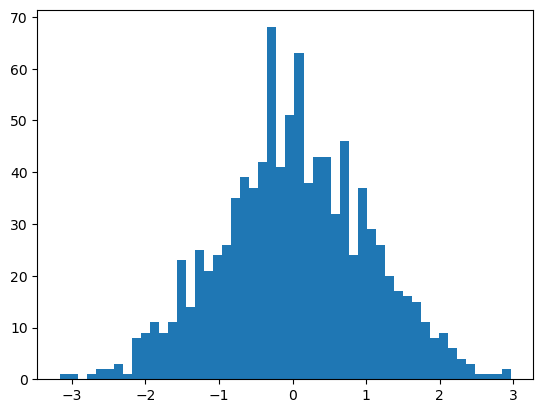

In [181]:
#Randomly sample colors from Gaussian
#Color=log_10(Flux1/Flux2)

colors = np.random.normal(loc=0, scale=1, size=numsamples)
#print(colors)
print(colors[0])
plt.hist(colors, bins=50)

[  58.5087985    58.94540632  138.06225295   59.05673482   61.81868274
   66.48760337   69.85204693  120.21574052   54.45812331   58.08104355
   82.93410517  175.68829711   61.78761207   94.80765177   53.73349666
   72.81323638   65.56573093   56.0444894    96.09445686   51.25313007
   56.86809862  226.14476927  147.99738603  153.59019355   52.30442965
  273.13281899   67.94287808   52.11336441   51.77586653  151.46022531
  348.3967373    69.39299217   64.32638137   59.40226665   84.68644988
  152.69613385   86.74158845  139.56035057   54.34606373  451.28634982
   68.28648821  150.26209735   61.05266044   79.02175235  160.75315035
  169.0028771   133.3460232    83.87756335   57.05329714   78.66562711
   68.05897229  141.55739975   93.6123121    95.11978437   52.01832913
  246.687836     82.18870044  117.47601393   56.78694183   57.87669765
   53.69109232  120.26813519   80.91671988  102.1625943    79.8726505
   67.38826405  119.4315732   210.10673569   66.46931145   53.098671
   54.750

Text(0.5, 1.0, 'Fluxes')

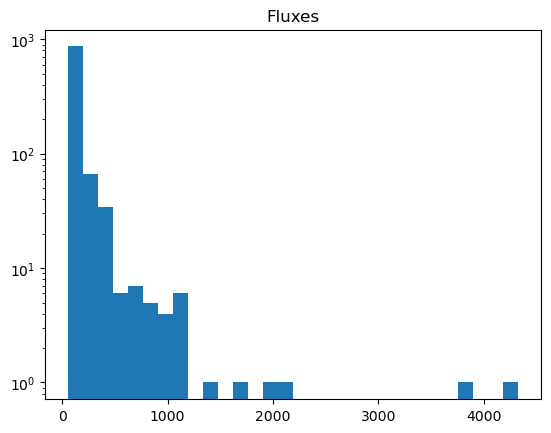

In [182]:
#Generating Flux values
#dN/dF scales by F^-5/2

def sample_flux(n_samples, F_min=1.0, F_max=100.0, alpha=2.5):
    u = np.random.uniform(0, 1, n_samples)
    exponent = alpha - 1
    return ( (u * (F_max**(-exponent) - F_min**(-exponent)) + F_min**(-exponent)) )**(-1 / exponent)

fluxes = 50*sample_flux(numsamples)
fluxes2=fluxes*(10**-colors)

print(fluxes)
plt.hist(fluxes, bins=30)
plt.yscale("log")
#plt.xscale('log')
plt.title("Fluxes")



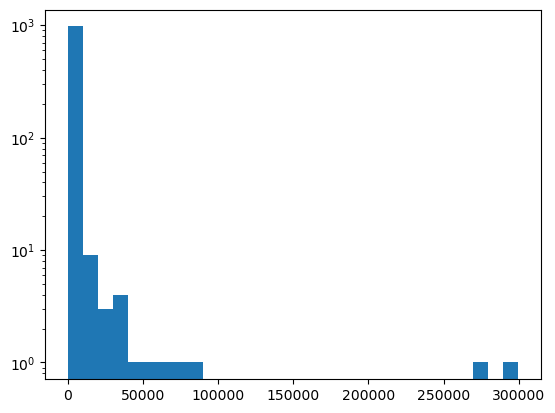

In [183]:
plt.hist(fluxes2, bins=30)
plt.yscale('log')

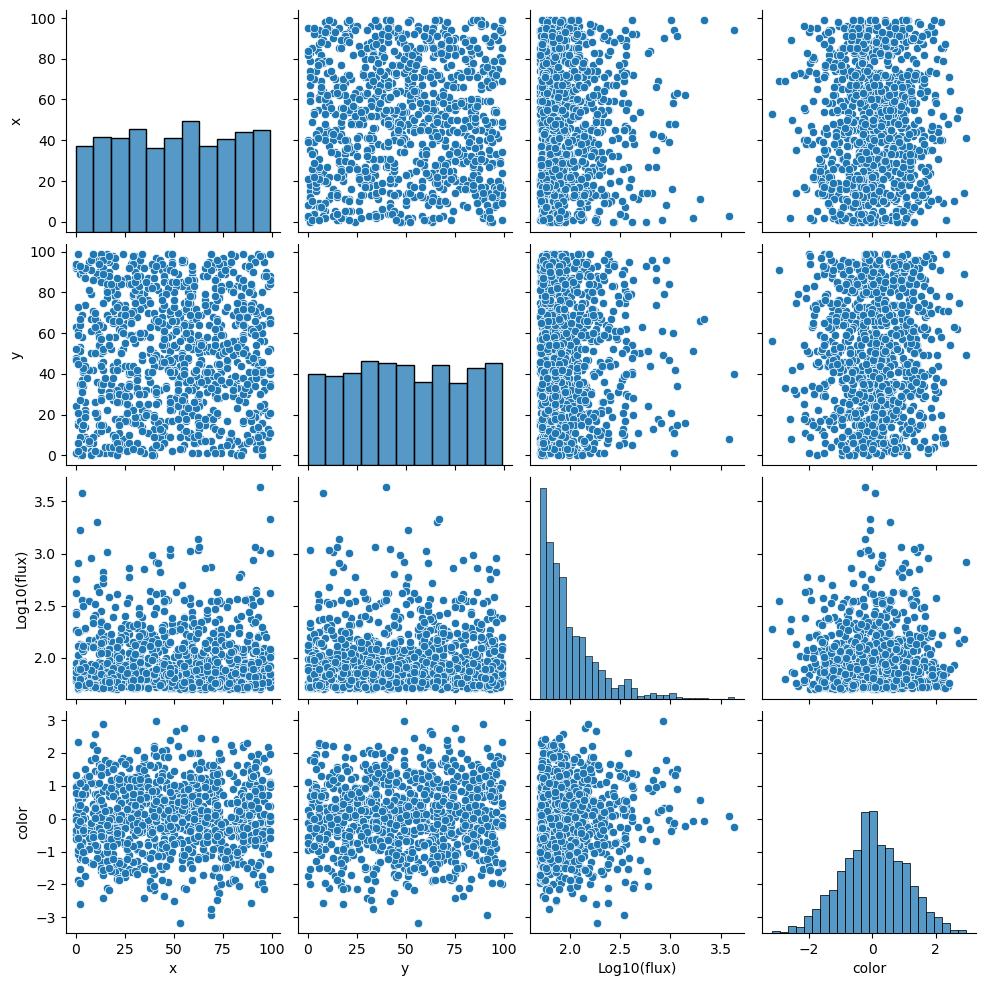

In [184]:
#Produce corner plot. This shows any relevant relationships between variables
data = pd.DataFrame({'x': xcoord, 'y': ycoord, 'Log10(flux)': np.log10(fluxes), 'color': colors})
sns.pairplot(data)
plt.show()

[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]


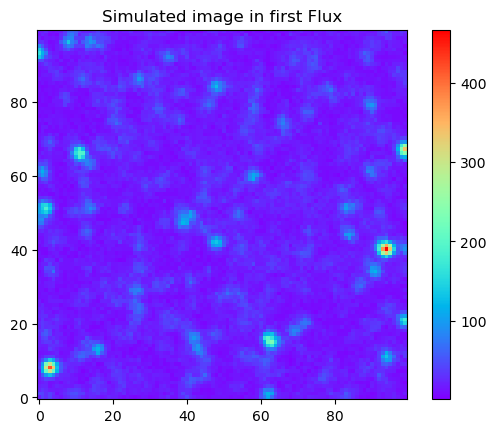

In [185]:
def simimage (x, y, f, background=10, fwhm=3):

    background_level = background
    background = np.full((grid_size, grid_size), background_level)
    print(background)

    fwhm = fwhm
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))

    #Taken from HW3
    source_counts = np.zeros((grid_size, grid_size))
    for xc, yc, flux in zip(x, y, f):
        gaussx, gaussy = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
        gaussian_psf = np.exp(-((gaussx - xc) ** 2 + (gaussy - yc) ** 2) / (2 * sigma ** 2))
        gaussian_psf /= gaussian_psf.sum()

        source_counts += flux * gaussian_psf
    mean_counts = background + source_counts
    return mean_counts
mean=simimage(xcoord, ycoord, fluxes)
simulated_image1 = np.random.poisson(mean)

plt.imshow(simulated_image1, cmap='rainbow', origin='lower')
plt.colorbar(label="")
plt.title("Simulated image in first Flux")
plt.axis("on")
plt.show()

[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]


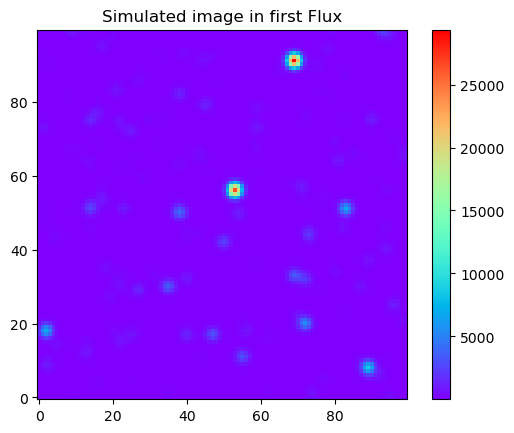

In [186]:
mean2=simimage(xcoord, ycoord, fluxes2)
simulated_image2 = np.random.poisson(mean2)

plt.imshow(simulated_image2, cmap='rainbow', origin='lower')
plt.colorbar(label="")
plt.title("Simulated image in second Flux")
plt.axis("on")
plt.show()

[[18 39 30 ... 16 11  8]
 [44 42 30 ... 13  9 18]
 [24 33 28 ...  9 10 11]
 ...
 [20  9 17 ... 11 14 16]
 [13 23 17 ... 20 27 21]
 [18 18 27 ... 18 35 29]]
[[ 39  85  86 ... 144  36  11]
 [ 43  63  64 ... 130  44  14]
 [ 23  37  55 ...  48  15  11]
 ...
 [ 11  12  13 ... 144  56  18]
 [ 14  10   6 ... 279  53  25]
 [  9   8  14 ... 203  51  21]]


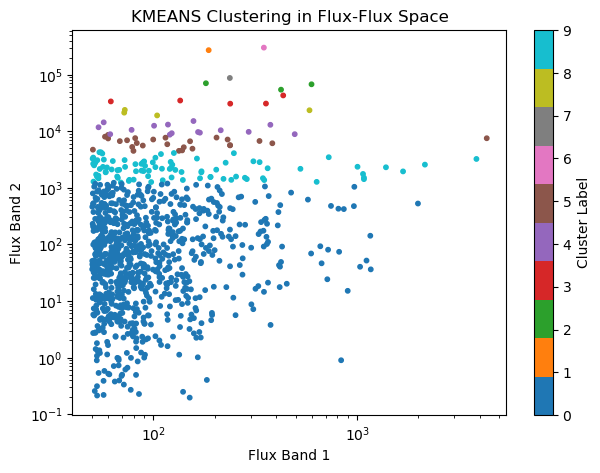

In [188]:

from sklearn.cluster import KMeans


cluster = np.vstack([fluxes, fluxes2]).T

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=0)
labels = kmeans.fit_predict(cluster)

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(cluster[:, 0], cluster[:, 1], c=labels, cmap='tab10', s=6)
plt.xlabel("Flux Band 1")
plt.ylabel("Flux Band 2")
plt.yscale('log')
plt.xscale('log')
#plt.xlim(100,200)
plt.title("KMEANS Clustering in Flux-Flux Space")
plt.colorbar(label="Cluster Label")
plt.show()

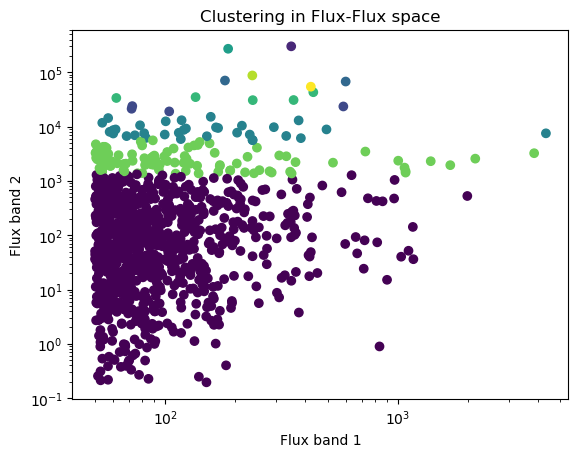

In [189]:
from sklearn.cluster import KMeans

flux_band1 = fluxes
flux_band2 = fluxes * 10**-colors

X = np.vstack([flux_band1, flux_band2]).T
kmeans = KMeans(n_clusters=10).fit(X)

# Optional: visualize
plt.scatter(flux_band1, flux_band2, c=kmeans.labels_)
plt.xlabel('Flux band 1')
plt.ylabel('Flux band 2')
plt.xscale('log')
plt.yscale('log')
plt.title('Clustering in Flux-Flux space')
plt.show()

In [191]:
#Implement a running window point source detection

from scipy.ndimage import uniform_filter, label, center_of_mass

def runningwindow(image, image_name='image', window_size=5, triggerthreshold=1):
    #Square off pixels in a nxn grid, take and standard deviation of the area. If the center point is bigger than the mean + triggerthreshold STDevs, record the area

    mean_image = uniform_filter(image, size=window_size)
    threshold = mean_image.mean() + triggerthreshold * mean_image.std()
    detections = image > threshold

    #Take every single candidate region, find the center of mass of the region, and plot the points over the image

    labeled_array, num_features = label(detections)
    candidate_positions = center_of_mass(image, labeled_array, range(1, num_features + 1))
    plt.imshow(image, origin='lower', cmap='rainbow')
    for b, a in candidate_positions:
        plt.plot(a, b, 'rx')
    plt.title(f"Detected {num_features} Candidates in {image_name} using Running Window" )
    plt.colorbar()
    plt.show()
    return candidate_positions



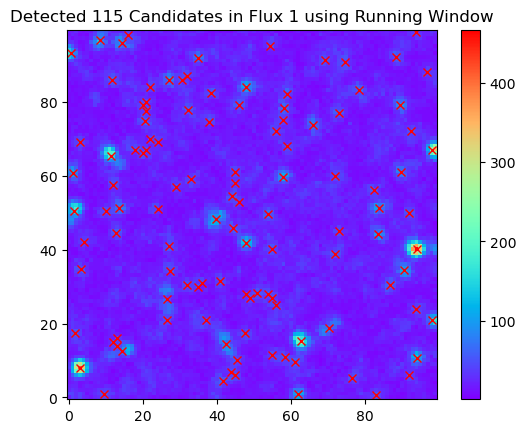

[(0.9138702460850112, 62.00559284116331),
 (0.5346534653465347, 83.0),
 (1.0, 9.510204081632653),
 (4.560538116591928, 41.65919282511211),
 (5.328767123287672, 76.67123287671232),
 (8.006633499170812, 3.1298270552001894),
 (6.0, 45.0),
 (6.0, 92.0),
 (7.0, 44.0),
 (9.612546125461254, 61.2029520295203),
 (10.745378151260503, 94.20336134453781),
 (12.534612748457848, 14.453050034270047),
 (10.0, 45.494949494949495),
 (14.584235860409146, 42.498796630565586),
 (11.52127659574468, 55.0),
 (11.0, 58.48598130841121),
 (15.275065104166666, 62.687825520833336),
 (14.0, 13.0),
 (15.0, 12.0),
 (16.0, 13.0),
 (17.3375, 1.69375),
 (17.310344827586206, 47.62758620689655),
 (18.782133090246127, 70.28896991795807),
 (20.91817398794143, 98.31007751937985),
 (21.0, 26.51578947368421),
 (21.0, 37.0),
 (26.497401633259095, 26.533036377134373),
 (24.0, 94.0),
 (25.0, 56.0),
 (27.0, 49.0),
 (27.0, 55.0),
 (28.0, 48.0),
 (28.23076923076923, 51.02714932126697),
 (28.0, 54.0),
 (30.48941176470588, 86.86588235

In [192]:
runningwindow(simulated_image1, "Flux 1", 5, 1.5)


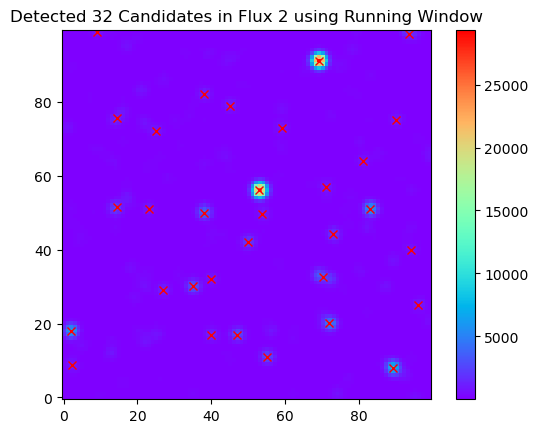

[(7.960705246969642, 89.07923130017801),
 (8.68092485549133, 2.325626204238921),
 (10.995839363241679, 55.00814037626628),
 (17.007388939256572, 46.99814143245693),
 (17.98279456146355, 2.005771444572353),
 (17.000582411182293, 40.00757134536983),
 (20.07369120434604, 71.89969319758467),
 (25.0, 96.0),
 (29.027708293246103, 26.99711371945353),
 (30.02735133899661, 34.92746942973601),
 (32.61286671068767, 70.09119422695971),
 (32.0, 40.0),
 (40.0, 94.0),
 (41.99586160108548, 49.99728629579376),
 (44.15520968439257, 73.00093673439977),
 (50.019661497922364, 38.00359785142394),
 (49.674842326559215, 53.705676243868254),
 (51.004910838105495, 83.01049059435825),
 (51.569492227979275, 14.44099481865285),
 (51.0, 23.0),
 (55.99737427394696, 53.00103816585647),
 (57.0, 71.0),
 (64.0, 81.0),
 (72.0, 25.0),
 (73.0, 59.0),
 (75.59688970738695, 14.588090853284223),
 (75.0, 90.0),
 (78.9799130254711, 45.0163594947194),
 (82.00604642090892, 38.02204017944217),
 (90.99747136948717, 68.99908887402574

In [193]:
runningwindow(simulated_image2, "Flux 2", 5, 1)

In [194]:
from scipy.ndimage import gaussian_filter
from scipy.ndimage import maximum_filter, label, find_objects


def matchedfilter(image, image_name='name', window_size=5, background=50, show=False):
    #Keep track of all pixels where the value is not equal to the background
    mask = image != background_level

    #Apply a filter around all points, negating all background
    filtered_data = gaussian_filter(image * mask, sigma=1)
    filtered_mask = gaussian_filter(mask.astype(float), sigma=1)

    #print(filtered_data)

    normalized_image = filtered_data / np.maximum(filtered_mask, 1e-8)

    threshold = background  

    neighborhood_size = window_size
    local_max = (normalized_image == maximum_filter(normalized_image, size=neighborhood_size))
    threshold_mask = normalized_image > threshold
    detected_peaks = local_max & threshold_mask
    labeled, num_objects = label(detected_peaks)

    peak_positions = np.array(np.nonzero(detected_peaks)).T  

    maskedx=[]
    maskedy=[]
    for y, x in peak_positions:
        maskedx.append(x)
        maskedy.append(y)
    plt.scatter(maskedx, maskedy, marker='x', color='red', label="Locations of sources")
    plt.imshow(filtered_data, cmap='rainbow', origin='lower')
    plt.colorbar(label="")
    plt.title(f"Matched Filter Detects {len(peak_positions)} Sources")
    plt.axis("on")
    #plt.legend()
    #if show is True:
    #    plt.show()
    return(peak_positions)

array([[ 0, 62],
       [ 8,  3],
       [11, 94],
       [13, 16],
       [15, 63],
       [16, 42],
       [18, 69],
       [21, 99],
       [24, 27],
       [29, 26],
       [34, 91],
       [40, 94],
       [42, 48],
       [44, 84],
       [48, 39],
       [51,  2],
       [51, 14],
       [51, 83],
       [60, 58],
       [61,  1],
       [61, 90],
       [66, 11],
       [67, 99],
       [74, 66],
       [79, 90],
       [84, 48],
       [86, 27],
       [92, 35],
       [93,  0],
       [96,  8],
       [96, 14]])

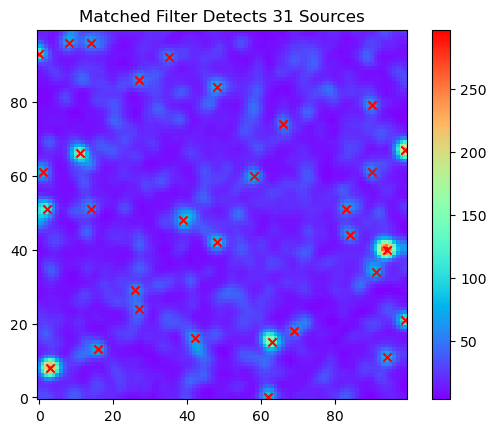

In [195]:
#Matched Filter
matchedfilter(simulated_image1, background=50)

In [196]:
import numpy as np
from scipy.optimize import least_squares

def gaussian_psf(xy, x0, y0, sigma):
    """Returns a 2D Gaussian PSF evaluated at xy given center and sigma."""
    x, y = xy
    return np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

def wls_single_source_fit(image, x0, y0, sigma=1.5, size=7):
    """
    Fit a 2D Gaussian PSF to a patch around a given position using WLS.
    Returns refined x, y, and flux.
    """
    half_size = size // 2
    y0_int, x0_int = int(round(y0)), int(round(x0))

    # Extract image patch around source
    patch = image[y0_int - half_size:y0_int + half_size + 1,
                  x0_int - half_size:x0_int + half_size + 1]
    
    ny, nx = patch.shape
    y_indices, x_indices = np.mgrid[0:ny, 0:nx]
    x_indices = x_indices + x0_int - half_size
    y_indices = y_indices + y0_int - half_size

    def model(params):
        x_c, y_c, flux = params
        psf_vals = gaussian_psf((x_indices, y_indices), x_c, y_c, sigma)
        return flux * psf_vals

    def residuals(params):
        return (patch - model(params)).ravel()  # WLS: all weights 1 for now

    init_params = [x0, y0, np.sum(patch)]
    result = least_squares(residuals, init_params)

    return result.x  # refined x, y, flux


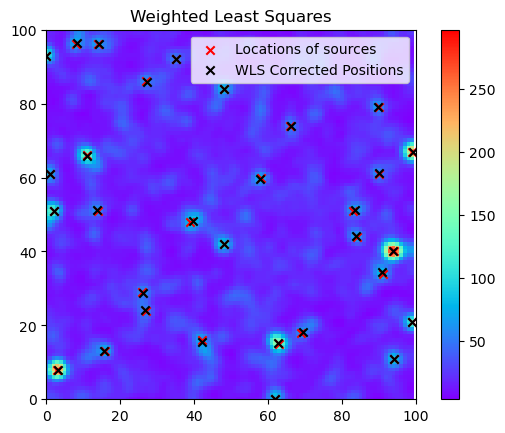

In [197]:
refined_sources = []

for y_peak, x_peak in matchedfilter(simulated_image1):
    x_refined, y_refined, flux = wls_single_source_fit(simulated_image1, x_peak, y_peak)
    refined_sources.append((x_refined, y_refined, flux))

refined_sources = np.array(refined_sources)
plt.scatter(refined_sources[:, 0], refined_sources[:, 1], marker='x', color='black', label="WLS Corrected Positions")
plt.xlim(0,100)
plt.ylim(0,100)
#matchedfilter(simulated_image1)
plt.title("Weighted Least Squares")
plt.legend()

In [198]:
print(refined_sources)

[[ 62.           0.           0.        ]
 [  3.04497157   8.00795734 360.87163449]
 [ 94.11054234  10.8677364  133.35018965]
 [ 15.69097669  13.05948703 120.74916049]
 [ 62.62371468  15.28857154 242.90859345]
 [ 42.15847204  15.404318   119.87021232]
 [ 69.46888194  18.30521576 100.50335595]
 [ 98.87133065  20.85252796 159.78517477]
 [ 26.69072911  24.13642566  89.97769192]
 [ 26.25009952  28.71038496  96.57455831]
 [ 90.72964923  34.3184583  129.76447344]
 [ 93.86467097  40.10755085 423.0369449 ]
 [ 47.99109648  41.93201494 141.84107534]
 [ 83.88876407  44.1051638  104.82138524]
 [ 39.56465994  48.15345638 149.43991972]
 [  2.          51.           0.        ]
 [ 13.61462743  51.24340495  95.70001566]
 [ 83.47874136  51.27268982 108.89133803]
 [ 57.88830991  59.727909   117.06264991]
 [  1.          61.           0.        ]
 [ 89.88023451  61.16587931  90.65055103]
 [ 11.10043528  65.82194223 216.04406617]
 [ 99.1094162   66.95769827 313.12263353]
 [ 66.12396667  73.88213727  87.56

In [199]:
import numpy as np

def mcmc_updater(curr_state, curr_likeli, likelihood, proposal_distribution):
    proposal_state = proposal_distribution(curr_state)
    prop_likeli = likelihood(proposal_state)
    accept_crit = prop_likeli / curr_likeli
    accept_threshold = np.random.uniform()
    if accept_crit > accept_threshold:
        return proposal_state, prop_likeli
    return curr_state, curr_likeli


def metropolis_hastings(
        likelihood, proposal_distribution, initial_state, 
        num_samples, stepsize=0.5, burnin=0.2):
    """ Compute the Markov Chain Monte Carlo

    Args:
        likelihood (function): a function handle to compute the likelihood
        proposal_distribution (function): a function handle to compute the 
          next proposal state
        initial_state (list): The initial conditions to start the chain
        num_samples (integer): The number of samples to compte, 
          or length of the chain
        burnin (float): a float value from 0 to 1.
          The percentage of chain considered to be the burnin length

    Returns:
        samples (list): The Markov Chain,
          samples from the posterior distribution
    """
    samples = []

    # The number of samples in the burn in phase
    idx_burnin = int(burnin * num_samples)

    # Set the current state to the initial state
    curr_state = initial_state
    curr_likeli = likelihood(curr_state)

    for i in range(num_samples):
        # The proposal distribution sampling and comparison
        #   occur within the mcmc_updater routine
        curr_state, curr_likeli = mcmc_updater(
            curr_state=curr_state,
            curr_likeli=curr_likeli,
            likelihood=likelihood,
            proposal_distribution=proposal_distribution
        )

        # Append the current state to the list of samples
        if i >= idx_burnin:
            # Only append after the burnin to avoid including
            #   parts of the chain that are prior-dominated
            samples.append(curr_state)

    return samples


def likelihood(x):
    # Standard Normal Distribution
    # An underlying assumption of linear regression is that the residuals
    # are Gaussian Normal Distributed; often, Standard Normal distributed
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)


def proposal_distribution(x, stepsize=0.5):
    # Select the proposed state (new guess) from a Gaussian distriution
    # centered at the current state, within a Guassian of width `stepsize`
    return np.random.normal(x, stepsize)




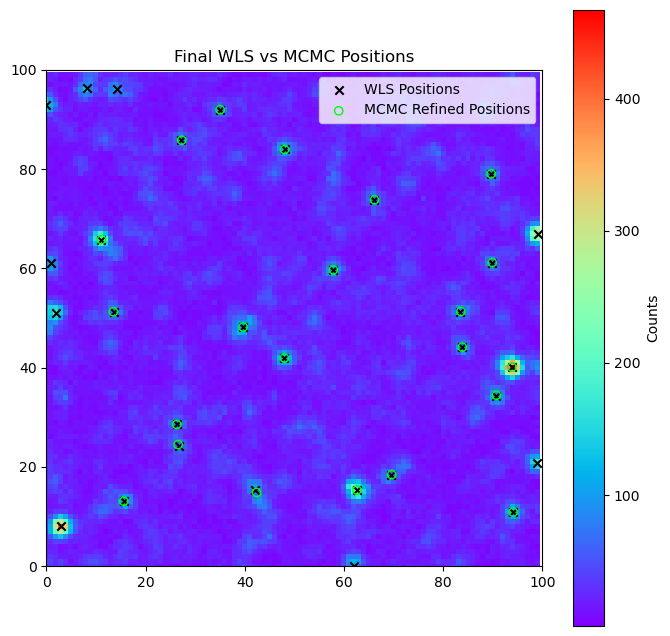

In [200]:
def log_likelihood_gaussian(params, data, xy, sigma_psf, noise_sigma=1.0):
    x0, y0, flux = params
    model = flux * gaussian_psf(xy, x0, y0, sigma_psf)
    residual = data - model
    return -0.5 * np.sum((residual / noise_sigma)**2)

def metropolis_hastings(log_likelihood, init_params, data, xy, sigma_psf, n_steps=5000, step_sizes=(0.2, 0.2, 5)):
    chain = [init_params]
    current_log_like = log_likelihood(init_params, data, xy, sigma_psf)

    for _ in range(n_steps):
        proposal = [p + np.random.normal(scale=s) for p, s in zip(chain[-1], step_sizes)]
        prop_log_like = log_likelihood(proposal, data, xy, sigma_psf)
        
        accept_prob = np.exp(prop_log_like - current_log_like)
        if np.random.rand() < accept_prob:
            chain.append(proposal)
            current_log_like = prop_log_like
        else:
            chain.append(chain[-1])

    return np.array(chain)

final_mcmc_sources = []

patch_size = 11
half_size = patch_size // 2
sigma_psf = 1.5

for x_wls, y_wls, flux_wls in refined_sources:
    x_int = int(round(x_wls))
    y_int = int(round(y_wls))
    if (x_int - half_size >= 0) and (x_int + half_size < grid_size) and (y_int - half_size >= 0) and (y_int + half_size < grid_size):
        patch = simulated_image1[y_int - half_size:y_int + half_size + 1, x_int - half_size:x_int + half_size + 1]
        
        ny, nx = patch.shape
        y_indices, x_indices = np.mgrid[0:ny, 0:nx]
        x_indices = x_indices + x_int - half_size
        y_indices = y_indices + y_int - half_size
        
        xy = (x_indices, y_indices)
        
        # Start MCMC from WLS results
        init_params = [x_wls, y_wls, flux_wls]
        
        samples = metropolis_hastings(log_likelihood_gaussian, init_params, patch, xy, sigma_psf, n_steps=3000)
        
        # Take mean of samples
        mean_params = np.mean(samples, axis=0)
        final_mcmc_sources.append(mean_params)

final_mcmc_sources = np.array(final_mcmc_sources)

# Plotting
plt.figure(figsize=(8,8))
plt.imshow(simulated_image1, origin='lower', cmap='rainbow')
plt.colorbar(label='Counts')

plt.scatter(refined_sources[:,0], refined_sources[:,1], marker='x', color='black', label='WLS Positions')
plt.scatter(final_mcmc_sources[:,0], final_mcmc_sources[:,1], marker='o', facecolors='none', edgecolors='lime', label='MCMC Refined Positions')
plt.title('Final WLS vs MCMC Positions')
plt.legend()
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.show()



In [201]:
def moffat_psf(xy, x0, y0, alpha=2.5, beta=1.5):
    x, y = xy
    r2 = (x - x0)**2 + (y - y0)**2
    return (1 + (r2 / alpha**2))**(-beta)
fluxes = 50 * sample_flux(numsamples, alpha=3.0)

gradient = np.linspace(1, 1.5, grid_size)  # East is brighter
fluxes_with_gradient = fluxes * gradient[np.array(xcoord)]

